In [27]:
pwd

'C:\\Users\\Kriszta\\desktop\\datas\\bike'

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
plt.rcParams['figure.figsize'] = (10,6)

In [8]:
df=pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Data Fields

datetime - hourly date + timestamp

season: 1 = spring 2 = summer 3 = fall 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals


In [9]:
# Define Variable of interest
y = df['count']
X = df.drop(['count', 'casual', 'registered','atemp'], axis=1)

drop casual and registered as they are included in count

what is atemp? "feels like" temperature -a quantification of your reaction and the worlds reaction to the temperature situation during a given condition. There a lot of factors to consider, a list of them would be like this: Temperature,Pressure,Humidity,Wind,Sunlight,ETC.

Will drop atemp as there are humidity,wind and temp columns


In [11]:
y.shape, X.shape

((10886,), (10886, 8))

In [12]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [13]:
X_train.shape, X_test.shape

((8164, 8), (2722, 8))

In [45]:
# Explore data

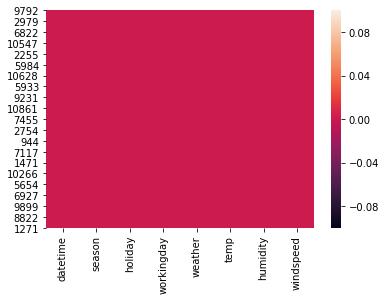

In [14]:
sns.heatmap(X_train.isna())

In [15]:
df_train = X_train.join(y_train)

In [16]:
df_train.describe()

,season,holiday,workingday,weather,temp,humidity,windspeed,count
count,8164.000000,8164.00000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.517883,0.02854,0.679691,1.415483,20.275012,61.793239,12.756427,191.341622
std,1.116315,0.16652,0.466624,0.630077,7.795902,19.303774,8.162060,179.640277
min,1.000000,0.00000,0.000000,1.000000,0.820000,0.000000,0.000000,1.000000
25%,2.000000,0.00000,0.000000,1.000000,13.940000,46.000000,7.001500,43.000000
50%,3.000000,0.00000,1.000000,1.000000,20.500000,61.000000,12.998000,145.000000
75%,4.000000,0.00000,1.000000,2.000000,26.240000,77.000000,16.997900,284.000000
max,4.000000,1.00000,1.000000,4.000000,41.000000,100.000000,56.996900,977.000000


(8.0, 0.0)

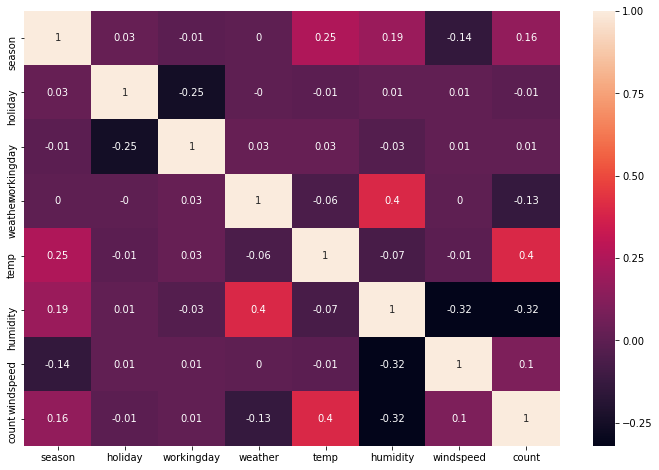

In [17]:
plt.rcParams['figure.figsize'] = (12,8)
corr_mat=df_train.corr().round(2)
ax = sns.heatmap(corr_mat, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

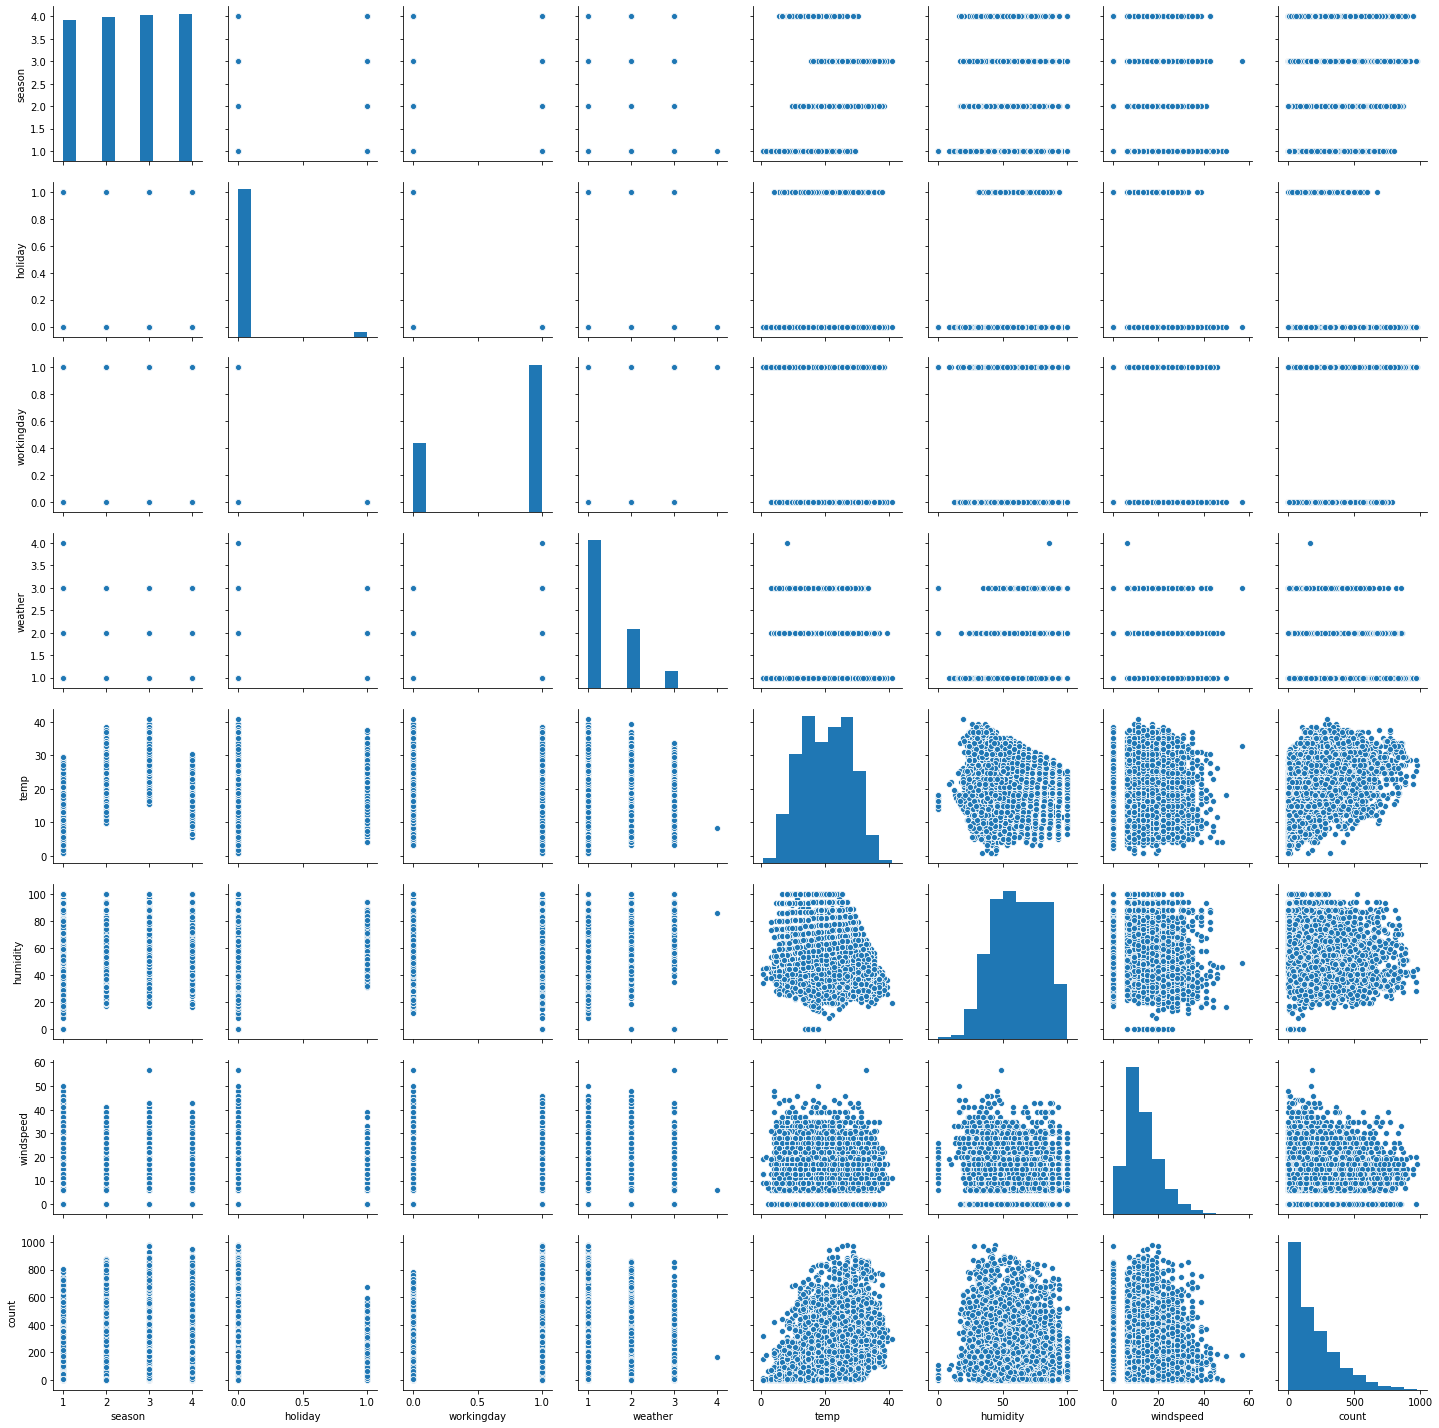

In [18]:
sns.pairplot(df_train)

In [19]:
# split datetime to date,year,month,day,hour

In [20]:
df_train['date']= pd.to_datetime(df_train['datetime']).dt.date
df_train['year']= pd.to_datetime(df_train['datetime']).dt.year
df_train['month']= pd.to_datetime(df_train['datetime']).dt.month
df_train['day']= pd.to_datetime(df_train['datetime']).dt.weekday_name
df_train['hour']= pd.to_datetime(df_train['datetime']).dt.hour

In [21]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,date,year,month,day,hour
9792,2012-10-12 09:00:00,4,0,1,1,20.50,39,19.9995,400,2012-10-12,2012,10,Friday,9
3815,2011-09-09 23:00:00,3,0,1,1,25.42,94,6.0032,148,2011-09-09,2011,9,Friday,23
2420,2011-06-08 18:00:00,2,0,1,1,36.90,37,15.0013,459,2011-06-08,2011,6,Wednesday,18
4176,2011-10-06 01:00:00,4,0,1,1,19.68,63,12.9980,22,2011-10-06,2011,10,Thursday,1
4283,2011-10-10 12:00:00,4,1,0,2,28.70,48,6.0032,365,2011-10-10,2011,10,Monday,12


Text(0.5, 1.0, 'seasons : 1 = spring 2 = summer 3 = fall 4 = winter ')

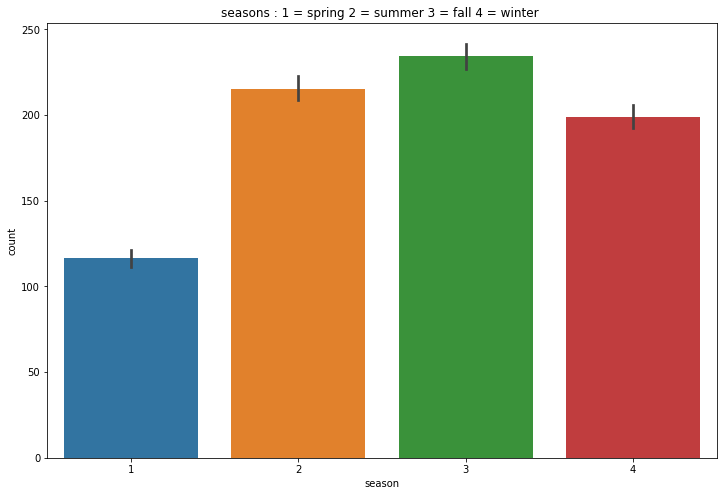

In [22]:
sns.barplot(data=df, x="season", y="count").set_title("seasons : 1 = spring 2 = summer 3 = fall 4 = winter ")

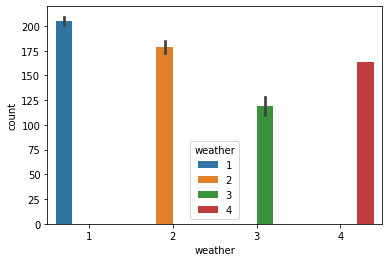

In [30]:
plt.rcParams['figure.figsize'] = (6,4)
sns.barplot(x = "weather", y = "count", data = df, hue = "weather")

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [44]:
# see the numer of rendted bikes in each season and for each weather category 

pd.DataFrame(df_train.groupby(['season','weather'])['count'].count())

count
season weather       
1      1         1296
       2          535
       3          157
       4            1
2      1         1337
       2          535
       3          164
3      1         1470
       2          458
       3          133
4      1         1297
       2          609
       3          172

It seems like the season is not important for the users, the counts are very similar in each weather category, so will drop season too 